In [1]:
import pandas as pd
import numpy as np

In [2]:
lista_espera = pd.read_csv('resultado_lista_de_espera.csv')
del lista_espera['Unnamed: 0']

In [3]:
lista_espera.head()

,Classif.,Inscr. Enem,Nome do Candidato,Nota,Unidade,Curso,Tipo Curso,Turno,Categoria Concorrência,Situação
0,1,211010235888,ANA LUIZA LEMOS DE OLIVEIRA,642.84,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
1,2,211015922282,KAIO LUCAS ARAUJO SILVA,642.12,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
2,3,211010875618,MIGUEL BARBOSA FARIAS,636.64,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
3,4,211005465250,RAONNY DELLANO MACEDO,633.18,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO
4,5,211015847166,KAIO VIEIRA NUNES,632.72,Crateús,Ciência da Computação,Bacharelado,Integral,Ampla Concorrência,CLASSIFICADO


In [4]:
lista_espera['Situação'].value_counts()

NÃO CLASSIFICADO      39717
CLASSIFICADO           2366
CLASSIFICADO NA AC      204
Name: Situação, dtype: int64

# One Hot Encoding

In [5]:
df = lista_espera.copy()
df.replace({'CLASSIFICADO': 1, 'CLASSIFICADO NA AC': 1, 'NÃO CLASSIFICADO': 0},
           inplace = True)
df = pd.get_dummies(df[df.columns[3:]]) 
situacao = df['Situação']
df.drop('Situação', axis=1, inplace=True)
df['Situação'] = situacao

In [6]:
df.head()

,Nota,Unidade_Crateús,Unidade_Fortaleza,Unidade_Itapajé,Unidade_Quixadá,Unidade_Russas,Unidade_Sobral,Curso_Administração,Curso_Agronomia,Curso_Análise e Desenvolvimento de Sistemas,...,Categoria Concorrência_Ampla Concorrência,Categoria Concorrência_L1,Categoria Concorrência_L10,Categoria Concorrência_L13,Categoria Concorrência_L14,Categoria Concorrência_L2,Categoria Concorrência_L5,Categoria Concorrência_L6,Categoria Concorrência_L9,Situação
0,642.84,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,642.12,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,636.64,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,633.18,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,632.72,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# Dividindo em treino e teste

Embaralhando os dados e os separando em 80% treino e 20% teste 

In [7]:
df = df.loc[np.random.permutation(df.index)]
div_point = int(len(df)*0.8)
df_treino = df.iloc[:div_point]
df_teste = df.iloc[div_point:]

# Random Forest

In [8]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [19]:
rf = RandomForestClassifier()
parametros = {'n_estimators': (50, 100, 150), 
              'criterion': ('gini', 'entropy'),
              'max_depth': (4, 6, 8, 10, 12)}
gs = GridSearchCV(rf, parametros)
gs.fit(df_treino[df_treino.columns[:-1]], df_treino[df_treino.columns[-1]])

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (4, 6, 8, 10, 12),
                         'n_estimators': (50, 100, 150)})

In [20]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 50}

In [21]:
rf.fit(df_treino[df_treino.columns[:-1]], df_treino[df_treino.columns[-1]])

RandomForestClassifier()

In [22]:
y_pred = rf.predict(df_teste[df_teste.columns[:-1]])
f1_score(np.array(df_teste[df_teste.columns[-1]]), y_pred)

0.8794178794178794

In [23]:
confusion_mtx = confusion_matrix(np.array(df_teste[df_teste.columns[-1]]), y_pred)
cm = pd.DataFrame(confusion_mtx, columns=['Ñ CLASS', 'CLASS'])
cm.index = ['Ñ CLASS', 'CLASS']
cm

,Ñ CLASS,CLASS
Ñ CLASS,7919,52
CLASS,64,423


### Área sob a curva ROC

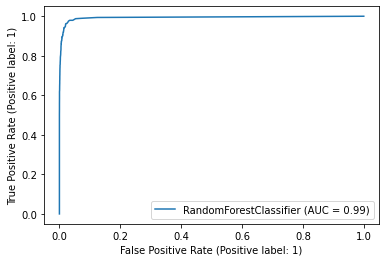

In [24]:
plot_roc_curve(rf, np.array(df_teste[df_teste.columns[:-1]]), np.array(df_teste[df_teste.columns[-1]]))
plt.show()

# Consulta Diferencialmente Privada